In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy.stats as stats

%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df = pd.read_csv('bank_full.csv', sep = ';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
def standard(df):
    df = (df-df.mean())/df.std()
    return df

def norm(df):
    df = (df - df.mean()) / (df.max() - df.min())
    return df
    
def importances(train, model):
    figure_1 = sorted(list(zip(train.columns, model.feature_importance(importance_type = 'gain'))))
    plt.figure(figsize=(10,14))
    x_imp = [tup[0] for tup in figure_1[:20]]
    y_labels = [tup[1] for tup in figure-1[:20]]
    sns.barplot(y_labels, x_imp)
    plt.title("Feature importance vs. total information gain")
    plt.show()


#for objects I am not standardizing or normalizing because i am changing everything to binary classifiers
def prep_data_object(d):
    copy = d.copy(deep = True)
    copy = copy.select_dtypes(include=["object"])
    copy = pd.get_dummies(copy.drop('y',axis=1))
    #copy['y'] = d['y']
    #copy['y'] = np.where(d['y'] == 'yes', 1, 0)
    return copy

def prep_data_numeric(d,x):
    copy_1 = d.copy(deep = True)
    #copy_1 = convert_output_to_int(copy_1)
    copy_1 = copy_1.select_dtypes(include=['int32','float','int64'])
    print(copy_1.head())
    if x == "standard":
        copy_1 = standard(copy_1)
        return copy_1
    if x == "norm":
        copy_1 = norm(copy_1)
        return copy_1
    else:    
        return copy_1   

def all_var_numeric(a):
    a1 = prep_data_object(a)
    a2 = prep_data_numeric(a, "norm")
    return pd.concat([a1,a2], axis=1, sort=False)

def create_ind_dummies(t, c):
    t = t.loc[:,["c"]]
    t = prep_data_object(t)
    return t

In [3]:
#useful functions
def get_error(crosstab):
    tI_errors = crosstab.loc[0,1] / crosstab.loc['All','All'] * 100
    tII_errors = crosstab.loc[1,0] / crosstab.loc['All','All'] * 100
    print(('\nType I errors: {}%\nType II errors: {}%\n').format(round(tI_errors, 2), round(tII_errors, 2)))
    
def get_precision_recall(crosstab):
    precision = crosstab.loc[1,1] / crosstab.loc['All', 1] * 100 
    recall = crosstab.loc[1,1] / crosstab.loc[1,'All'] * 100 
    print(('Precision: {}%\nRecall: {}%').format(round(precision, 2), round(recall, 2)))

def fit_and_train(model):
    #test and train on the train itself.
    model_fit = model.fit(X, Y)
    model_score_train = model.score(X,Y)
    print('----Results based only on training dataset----')
    print('Accuracy:', model_score_train)
    
    train_crosstab = pd.crosstab(Y, model_fit.predict(X), rownames=['actual'], colnames=['predicted'], margins=True)
    print(train_crosstab)
    
    get_error(train_crosstab)
    get_precision_recall(train_crosstab)
    
    model_score_test = model.score(X_test, Y_test)
    print('\n----Results based on test dataset----')
    print('Accuracy:', model_score_test)
    
    test_crosstab = pd.crosstab(Y_test, model_fit.predict(X_test), rownames=['actual'], colnames=['predicted'], margins=True)
    print(test_crosstab)
    
    get_error(test_crosstab)
    get_precision_recall(test_crosstab)
    

In [19]:
print(df.dtypes)
#our goal is to predict whether a person that was targeted by this telemarking campaign will make a fixed term deposit in this portugese bank
#we will need to use classification rather than regression. However, we will use logistic regression as well since it can be used to predict the orientation of a binary dependant variable
df = pd.read_csv('bank_full.csv', sep = ';')
# 10 numerical independant variables
df_num = df.select_dtypes(include=['int32','float','int64'])

def convert_output_to_int(d):
    d["y"] = np.where(d["y"] == 'yes', 1, 0)
    return d["y"]

df_num["y"] = convert_output_to_int(df)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


c:\users\imnus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [20]:

print(df_num.columns)
y = df_num["y"]
df_num = df_num.loc[:,['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
df_num = norm(df_num)
df_num.head()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.197234,0.000552,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601
1,0.209580,-0.022221,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601
2,-0.037334,-0.006565,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601
3,-0.000297,-0.021815,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601
4,0.197234,0.009905,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601


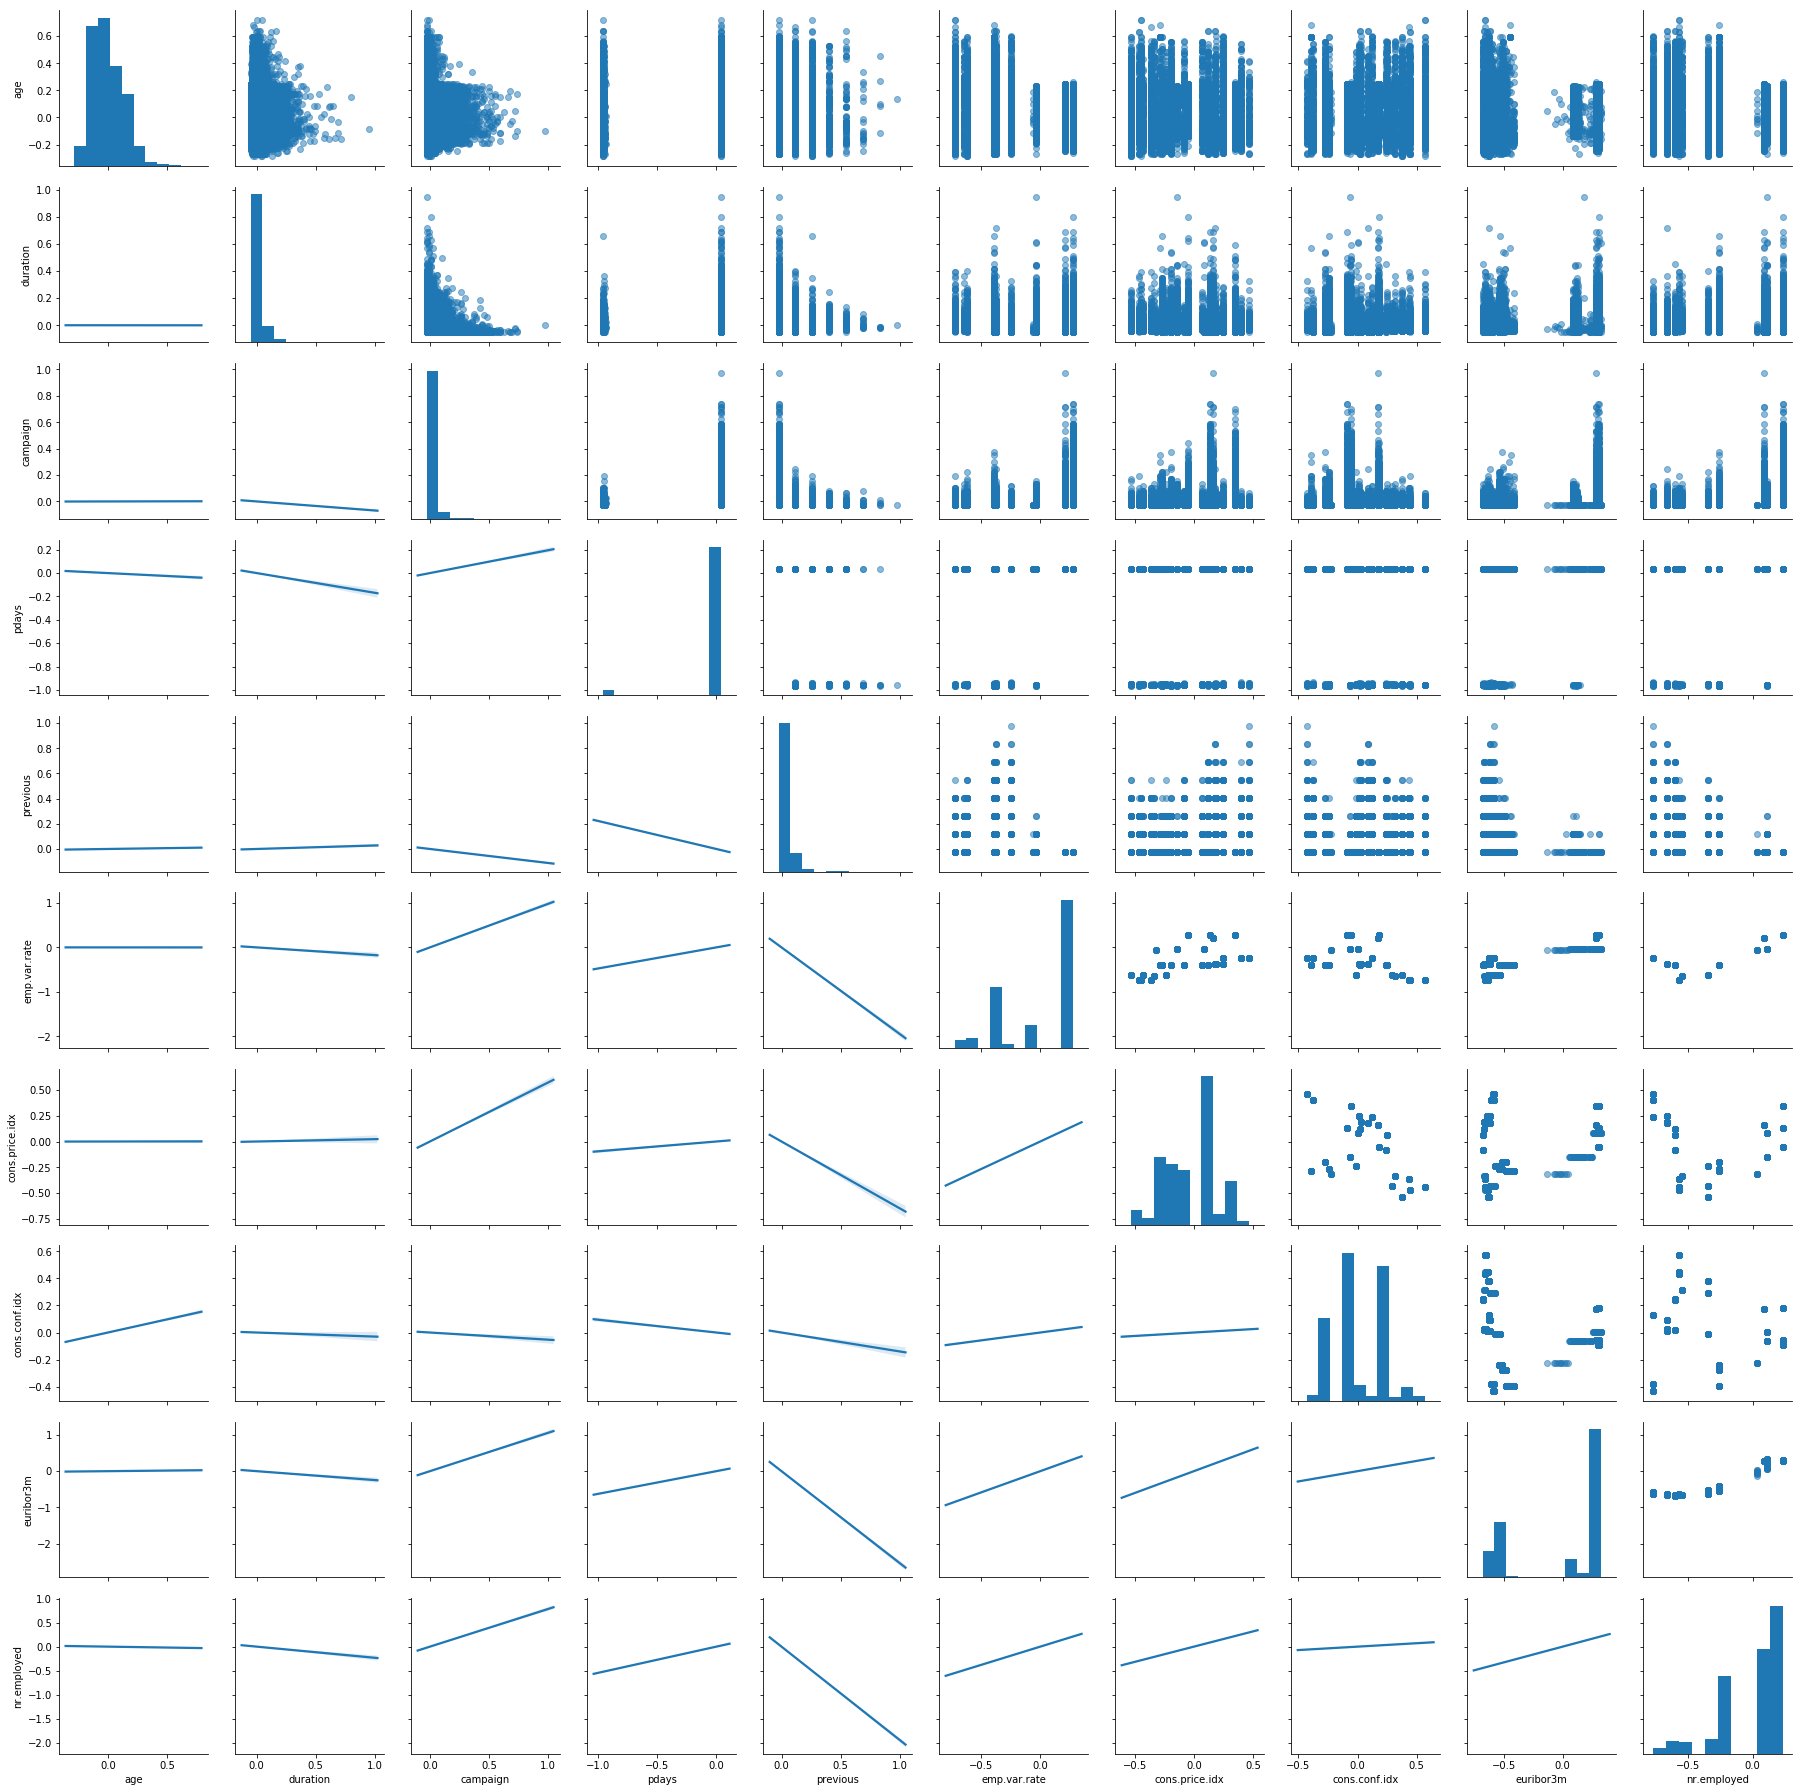

In [16]:

g = sns.PairGrid(df_num, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(plt.hist, lw=3)
plt.show()

c:\users\imnus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


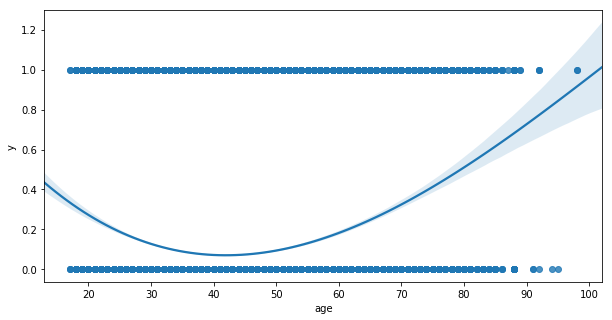

In [21]:
# focusing on age vs outcome and number of calls or "campaign" vs outcome
df = pd.read_csv('bank_full.csv', sep = ';')
# 10 numerical independant variables
df_num = df.select_dtypes(include=['int32','float','int64'])

def convert_output_to_int(d):
    d["y"] = np.where(d["y"] == 'yes', 1, 0)
    return d["y"]

df_num["y"] = convert_output_to_int(df)
#age vs output
ax = sns.regplot(x='age', y= 'y', order=3, data=df_num)

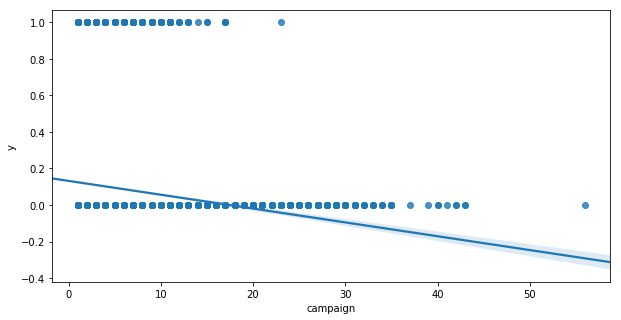

In [22]:
#shows that calling an individual more than 20 times is useless
ax = sns.regplot(x='campaign', y= 'y', order=1, data=df_num)

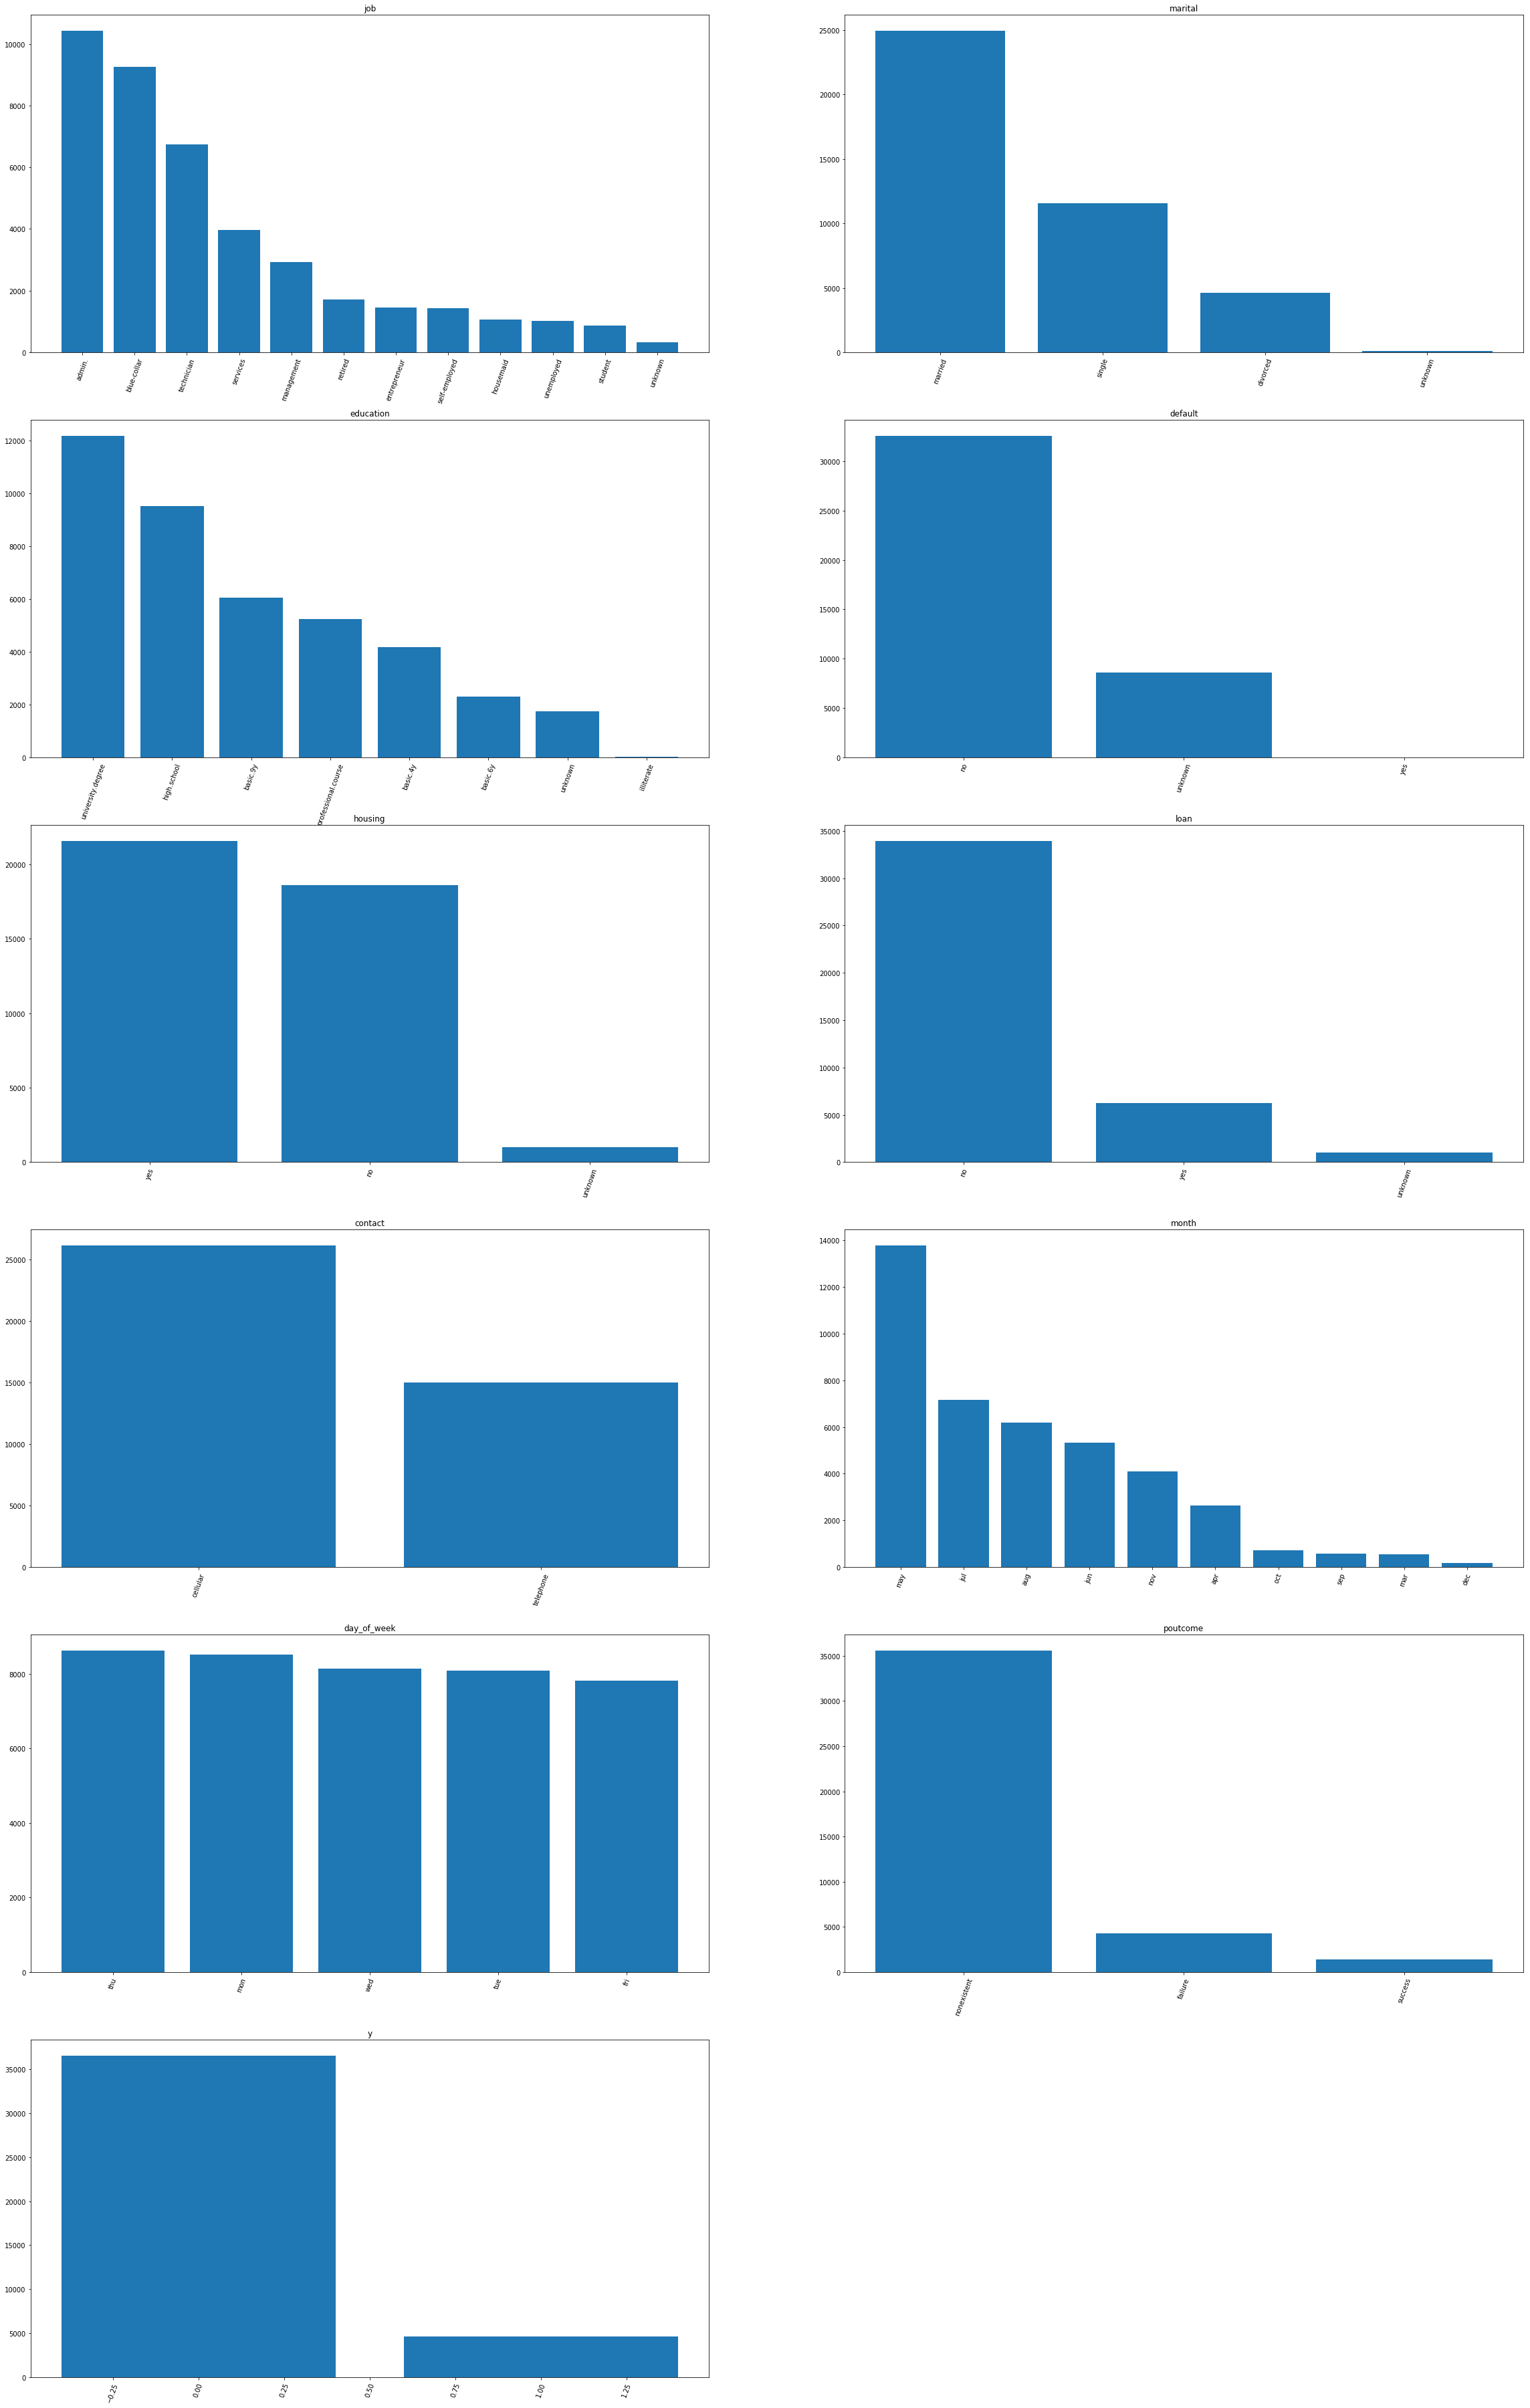

In [14]:
#categoricals -- 
categoricals = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y']

def bar_chart_categorical(d):
    plt.figure(figsize = (40,65))
    for i, col in enumerate(categoricals):
        plt.subplot(6,2,i+1)
        plt.bar(df[col].value_counts().index, height = df[col].value_counts())
        plt.xticks(rotation=70)
        plt.title(col)
    plt.show()

bar_chart_categorical(df)

Text(0.5,1,'Outcome of campaign')

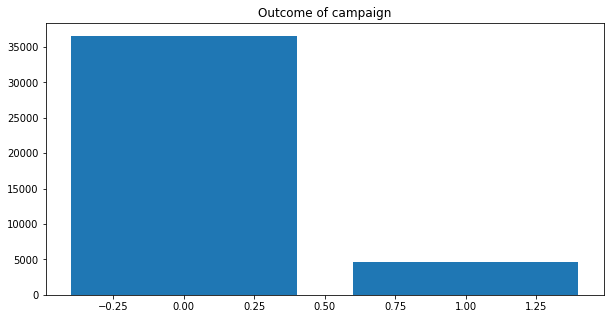

In [51]:
plt.bar(df['y'].value_counts().index, height = df['y'].value_counts())
plt.title('Outcome of campaign')

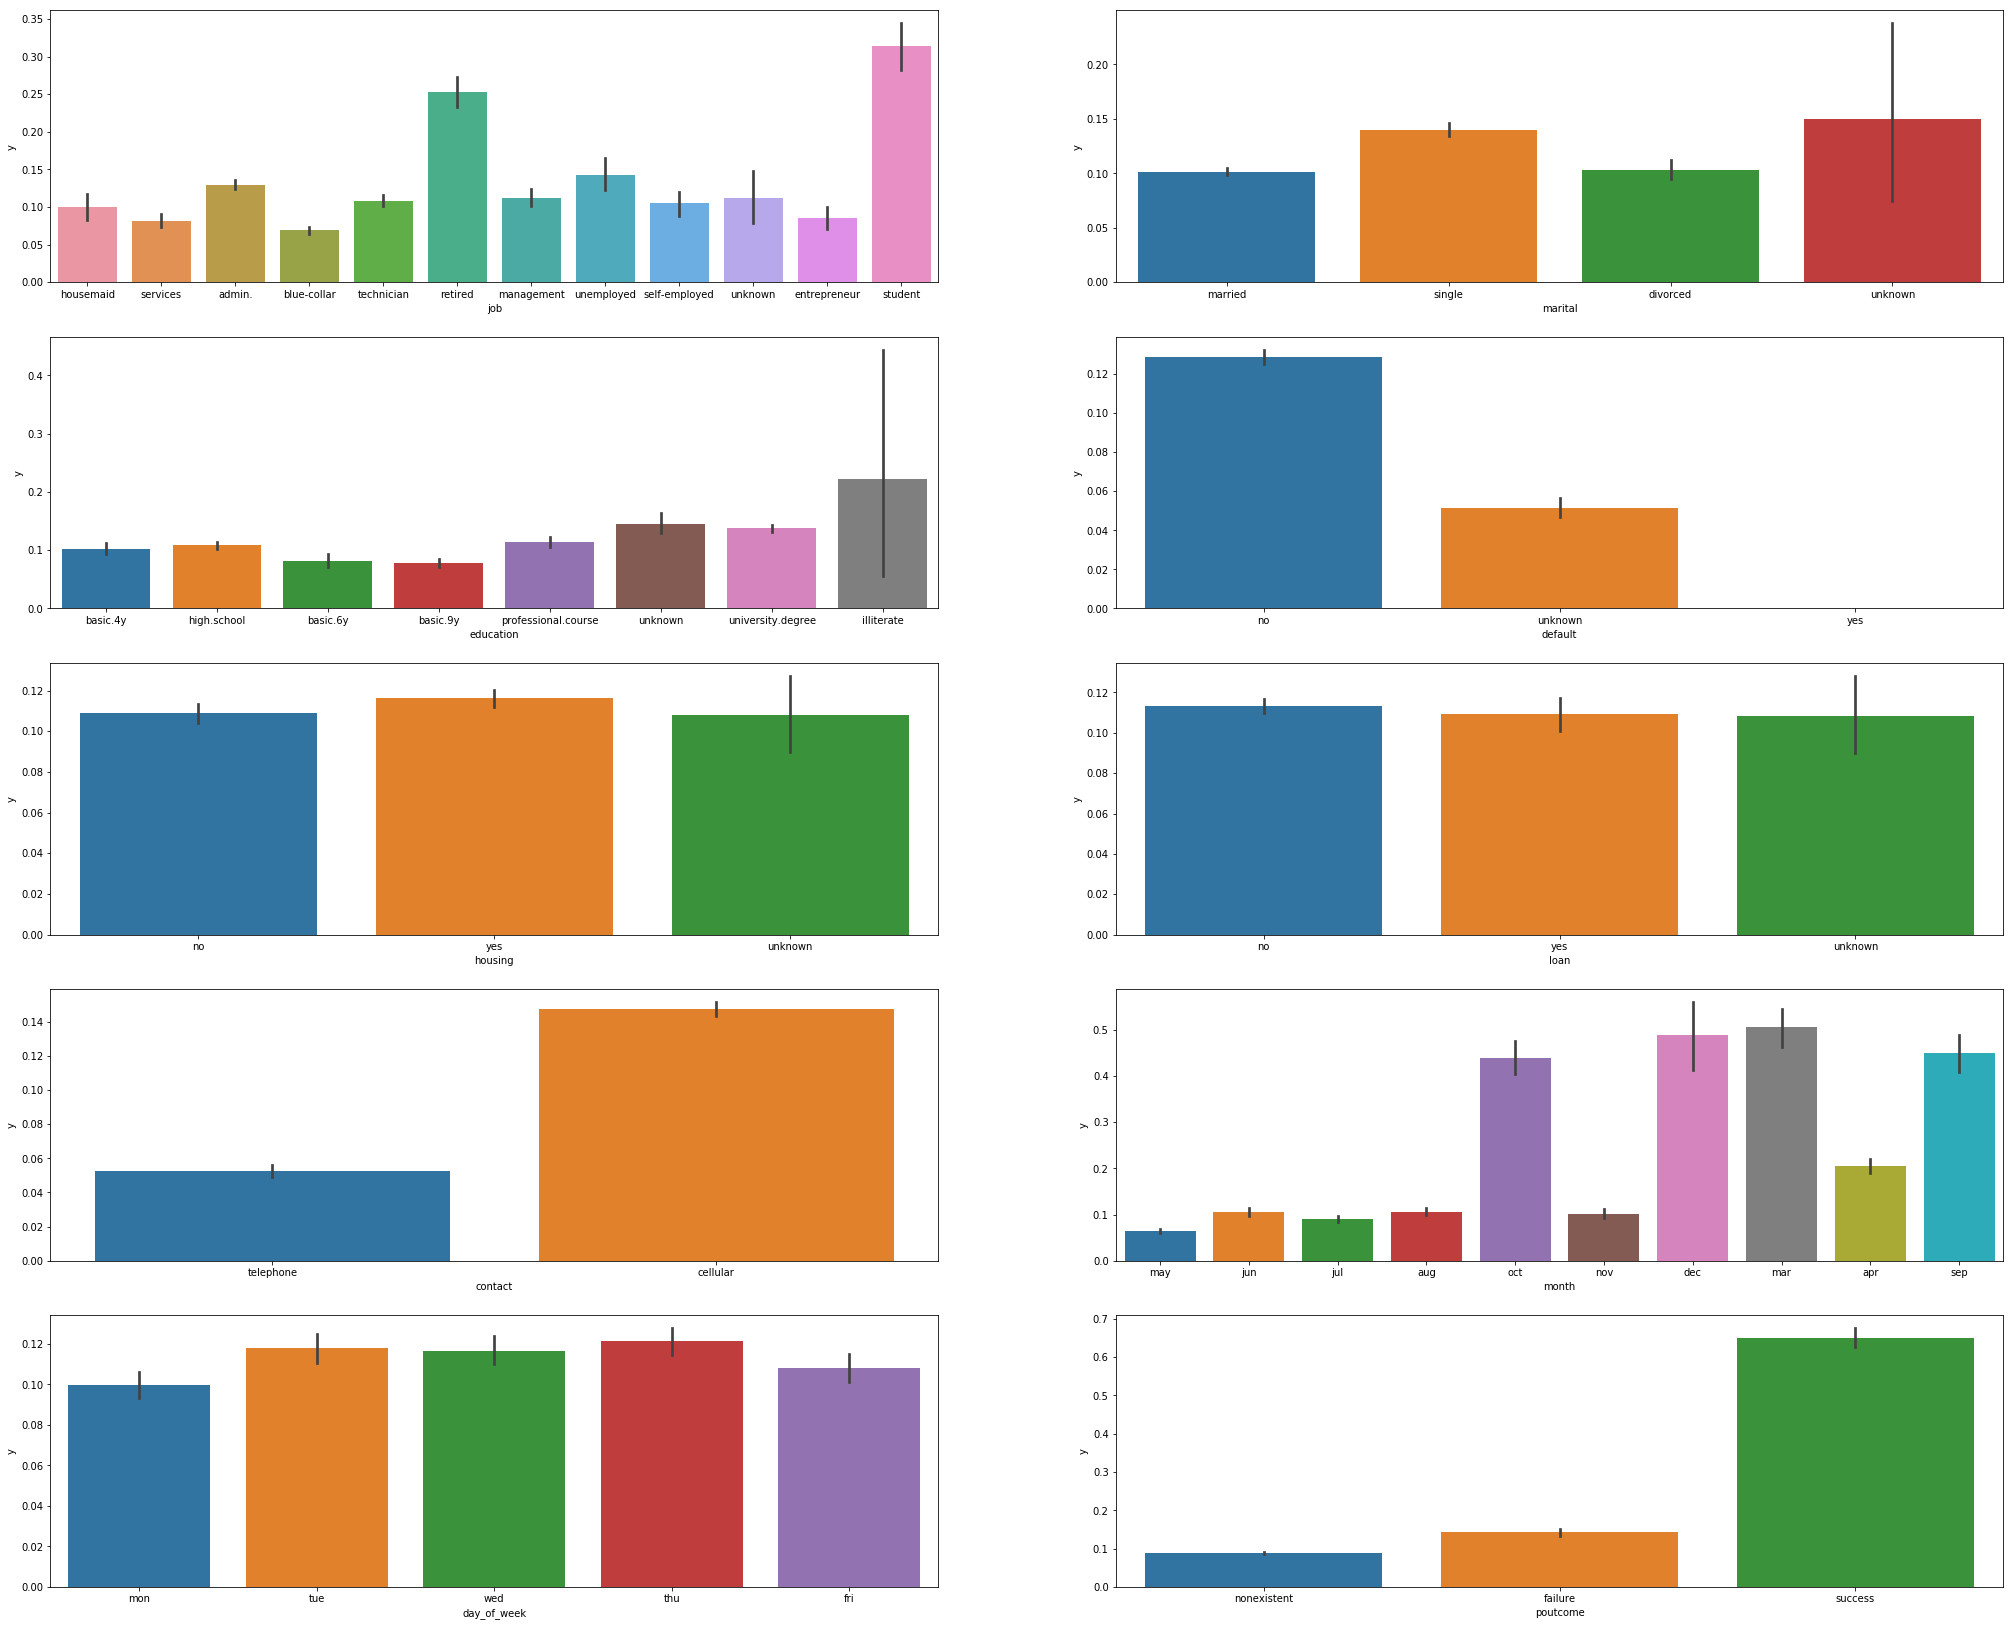

In [44]:
categoricals = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']
df = pd.read_csv('bank_full.csv', sep = ';')

df['y'] = np.where(df['y'] == 'yes', 1, 0)
def sns_barplot_categorical(d):
    plt.figure(figsize = (35,35))
    #sns.set_color_codes("color")
    for i, col in enumerate(categoricals):
        plt.subplot(6,2,i+1)
        sns.barplot(x=col, y="y", data=df,
            label="T")
sns_barplot_categorical(df)

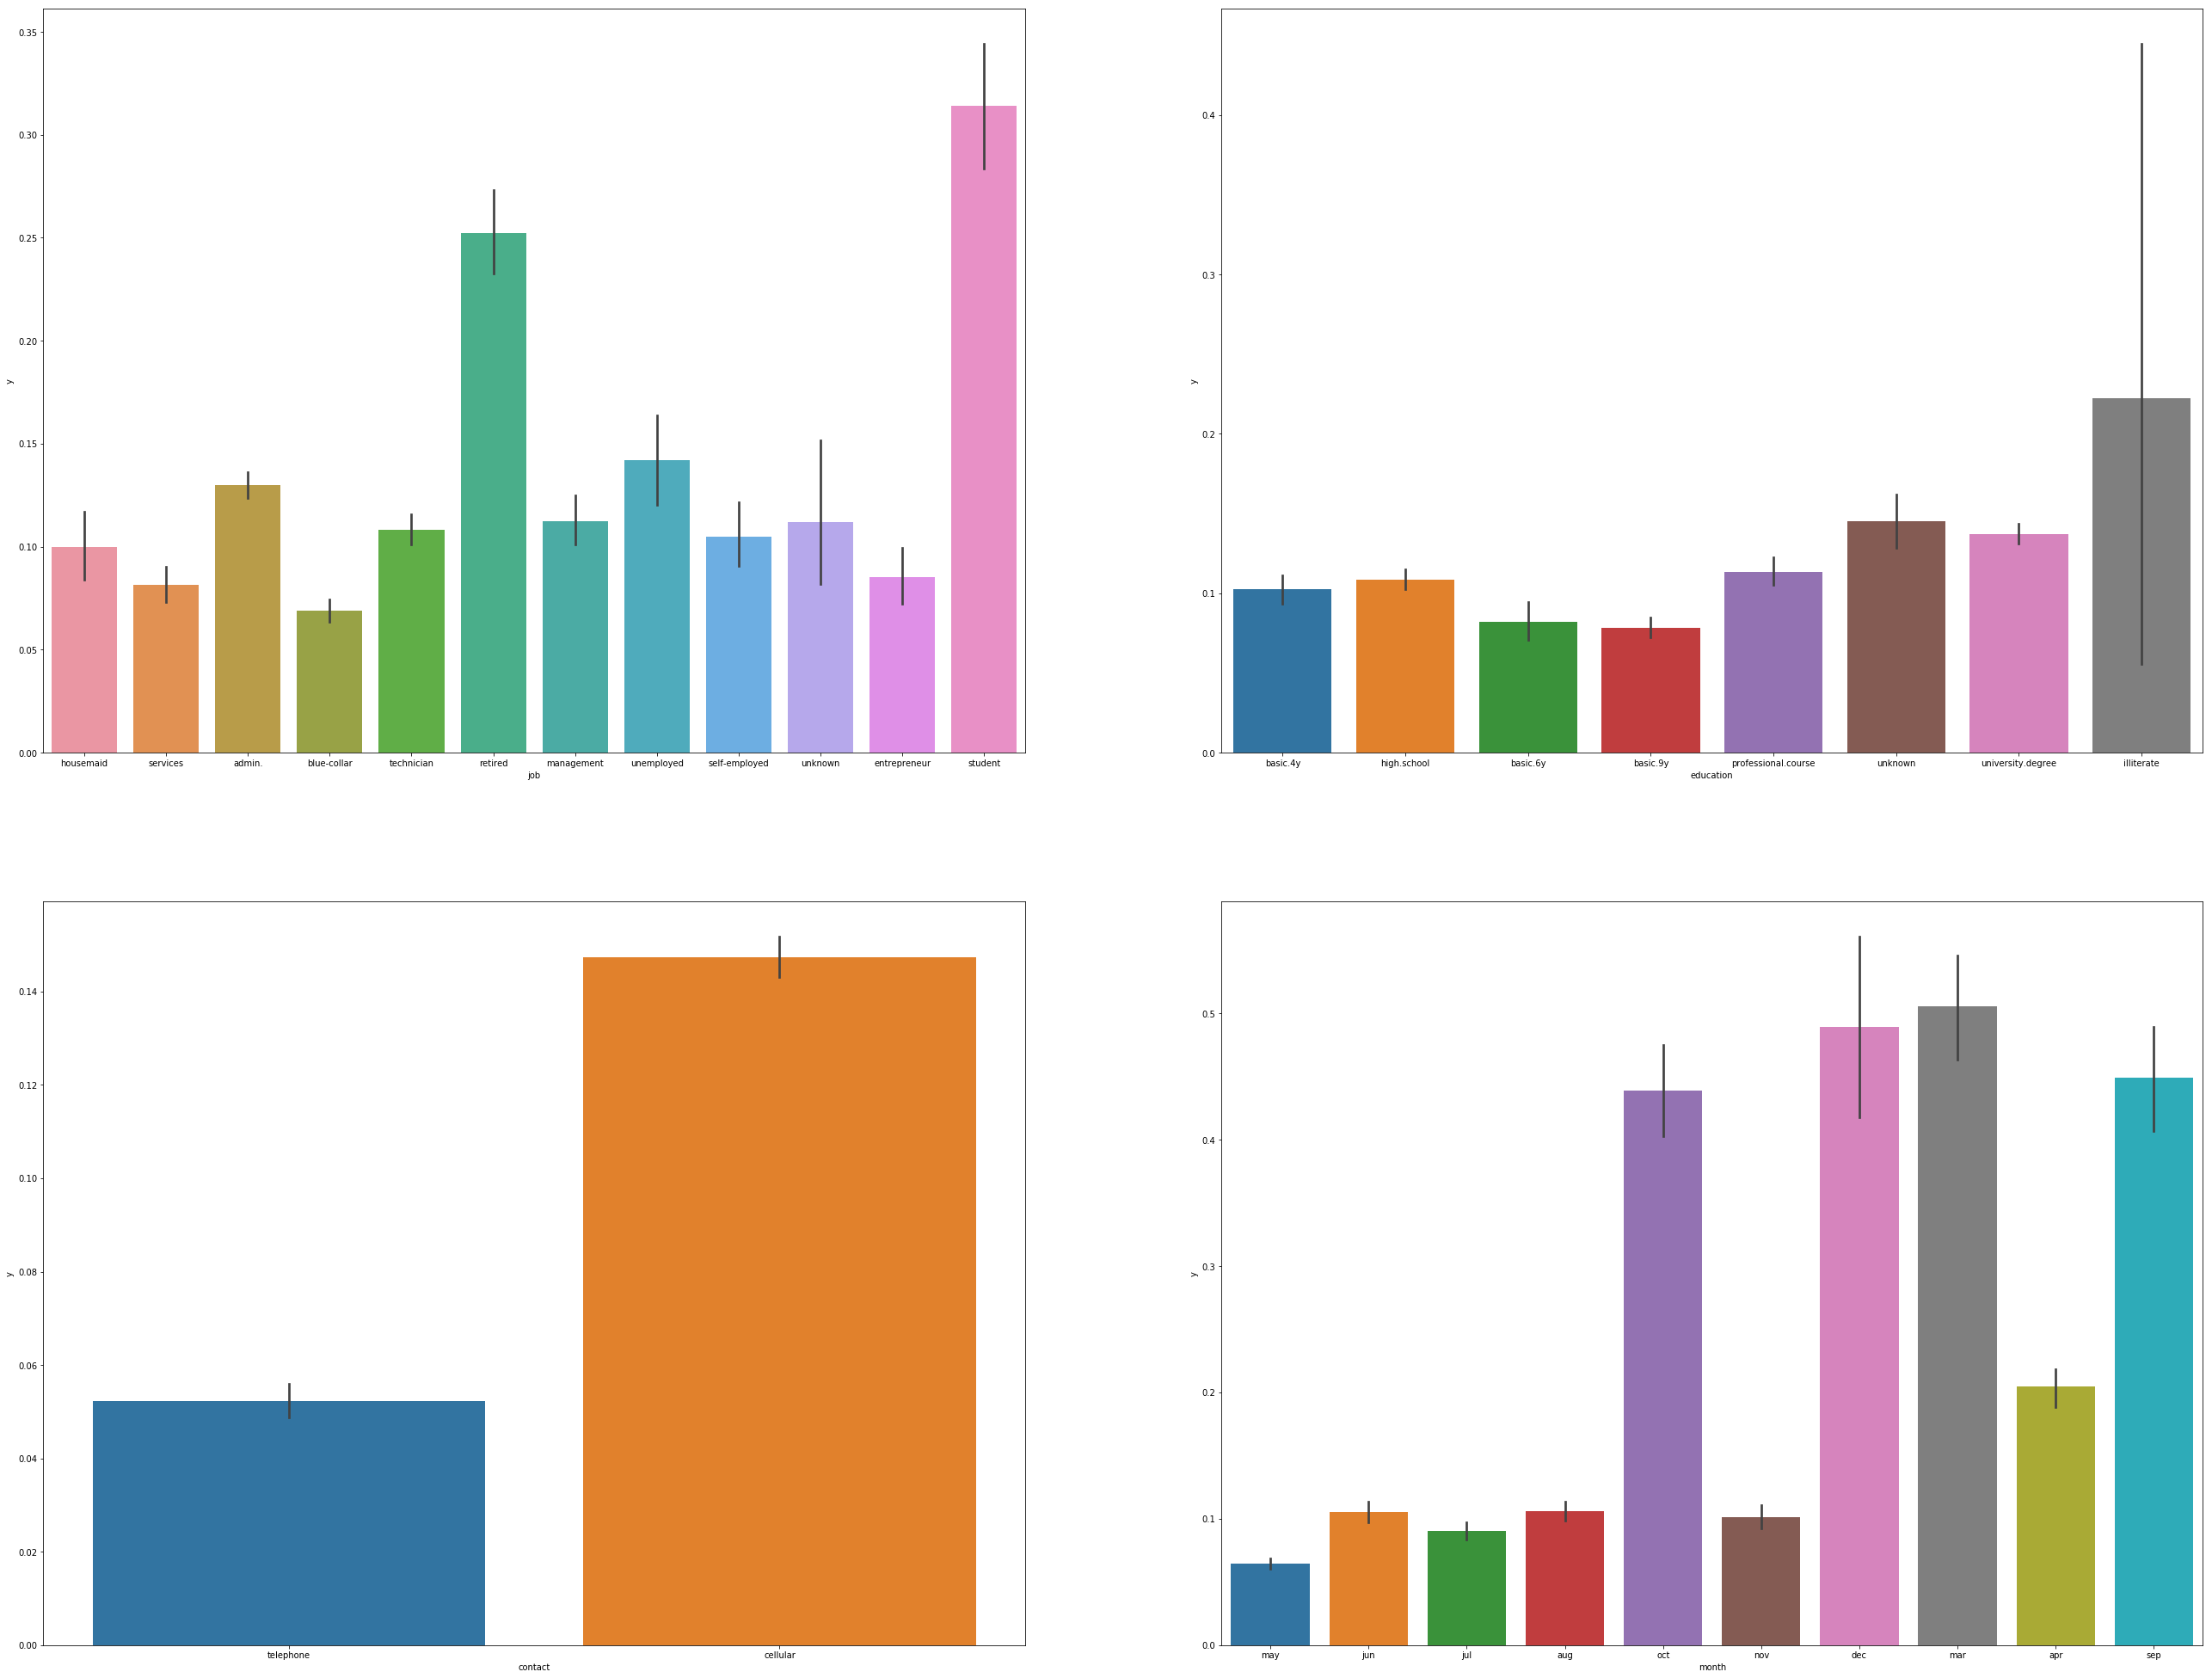

In [47]:
categoricals = ['job', 'education', 'contact',
       'month']
df = pd.read_csv('bank_full.csv', sep = ';')

df['y'] = np.where(df['y'] == 'yes', 1, 0)
def sns_barplot_categorical(d):
    plt.figure(figsize = (45,35))
    #sns.set_color_codes("color")
    for i, col in enumerate(categoricals):
        plt.subplot(2,2,i+1)
        sns.barplot(x=col, y="y", data=df,
            label="T")
sns_barplot_categorical(df)

In [23]:
df = pd.read_csv('bank_full.csv', sep = ';')

#now we will look at object variables.
object_var = df.select_dtypes(include=["object"])
#object_var["y"] = convert_output_to_int(object_var)
object_var.head()


print(object_var.shape[0])
print(df_num.shape[0])

def prep_data_object(d):
    copy = d.copy(deep = True)
    copy = copy.select_dtypes(include=["object"])
    copy = pd.get_dummies(copy.drop('y',axis=1))
    #copy['y'] = d['y']
    #copy['y'] = np.where(d['y'] == 'yes', 1, 0)
    return copy

object_var = prep_data_object(object_var)
object_var.describe()
#print(df_num.head())

allfeat_df =  pd.concat([object_var,df_num], axis=1, sort=False)
allfeat_df.head()

41188
41188


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
allfeat_df.columns


Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',

In [25]:
#implementing test/train split

from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(allfeat_df.loc[:,['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']], allfeat_df['y'], test_size= 0.20, random_state=20)
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(32950, 63)
(32950,)
(8238, 63)
(8238,)


In [26]:
#dealing with class imbalance
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state = 1, ratio = 1.0)
xx = X
yy = Y

x_balanced,y_balanced = smote.fit_sample(xx,yy)

print(x_balanced.shape)
print(y_balanced.shape)

x_var = list(xx.columns)
bal_df = pd.DataFrame(data = x_balanced , columns = x_var)
bal_df.describe()
bal_df.describe()

c:\users\imnus\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


(58440, 63)
(58440,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.00000,58440.000000,58440.000000,58440.000000,...,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000,58440.000000
mean,0.272998,0.189336,0.032716,0.024092,0.072435,0.061268,0.03181,0.084471,0.035564,0.159984,...,40.191807,387.063530,2.311677,885.051912,0.315042,-0.493880,93.480670,-40.221687,2.967480,5135.764410
std,0.411569,0.370245,0.166019,0.143464,0.239104,0.225784,0.16381,0.261334,0.167496,0.340240,...,11.473072,359.325202,2.273270,316.523587,0.667994,1.718084,0.619153,5.199099,1.888033,86.691177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,31.636688,144.796492,1.000000,999.000000,0.000000,-1.800000,92.941999,-42.700000,1.244000,5076.200000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,37.485848,265.000000,1.920485,999.000000,0.000000,-0.100000,93.444000,-41.391856,4.021000,5191.000000
75%,0.633739,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,47.156462,523.000000,2.852989,999.000000,0.088031,1.400000,93.994000,-36.400000,4.958665,5228.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [27]:
X = bal_df
Y = y_balanced
Y_test = Y_test.values

print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(58440, 63)
(58440,)
(8238, 63)
(8238,)


In [26]:
print(type(X))
print(type(Y))
print(type(X_test))
type(Y_test)


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV#initiate param grid

knn = KNeighborsClassifier()

params = {'n_neighbors':[1],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}



# instantiate the grid
grid = GridSearchCV(knn, params, cv=10, scoring='accuracy')

#fit data into grid
grid.fit(X, Y)

grid.grid_scores_

Exception in thread Thread-15852:
Traceback (most recent call last):
  File "c:\users\imnus\appdata\local\programs\python\python36\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "c:\users\imnus\appdata\local\programs\python\python36\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\imnus\appdata\local\programs\python\python36\lib\multiprocessing\pool.py", line 463, in _handle_results
    task = get()
  File "c:\users\imnus\appdata\local\programs\python\python36\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "c:\users\imnus\appdata\local\programs\python\python36\lib\multiprocessing\connection.py", line 318, in _recv_bytes
    return self._get_more_data(ov, maxsize)
  File "c:\users\imnus\appdata\local\programs\python\python36\lib\multiprocessing\connection.py", line 337, in _get_more_data
    assert left > 0
AssertionError



In [ ]:
grid.best_estimator_

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
fit_and_train(knn)


----Results based only on training dataset----
Accuracy: 1.0
predicted      0      1    All
actual                        
0          29220      0  29220
1              0  29220  29220
All        29220  29220  58440

Type I errors: 0.0%
Type II errors: 0.0%

Precision: 100.0%
Recall: 100.0%

----Results based on test dataset----
Accuracy: 0.8143966982277252
predicted     0     1   All
actual                     
0          6282  1046  7328
1           483   427   910
All        6765  1473  8238

Type I errors: 12.7%
Type II errors: 5.86%

Precision: 28.99%
Recall: 46.92%


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X, Y, cv=10)

array([0.87200548, 0.90075291, 0.91820671, 0.9202601 , 0.92488022,
       0.91563997, 0.91427105, 0.92402464, 0.92642026, 0.91837782])

In [37]:
param_grid = dict(C=[0.0001,
 0.001,
 0.01,
 0.03,
 0.1,
 0.3,
 0.6,
 1,
 1.3,
 1.6,
 2,
 5,
 10,
 15,
 20,
 50,
 100])
print(param_grid)

{'C': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.6, 1, 1.3, 1.6, 2, 5, 10, 15, 20, 50, 100]}


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()

grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', verbose=3, n_jobs=-1, return_train_score=True)


grid.fit(X,Y)

Fitting 3 folds for each of 17 candidates, totalling 51 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   16.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.6, 1, 1.3, 1.6, 2, 5, 10, 15, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [34]:
grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

fit_and_train(lr)

----Results based only on training dataset----
Accuracy: 0.8857973990417523
predicted      0      1    All
actual                        
0          25274   3946  29220
1           2728  26492  29220
All        28002  30438  58440

Type I errors: 6.75%
Type II errors: 4.67%

Precision: 87.04%
Recall: 90.66%

----Results based on test dataset----
Accuracy: 0.872784656470017
predicted     0     1   All
actual                     
0          6403   925  7328
1           123   787   910
All        6526  1712  8238

Type I errors: 11.23%
Type II errors: 1.49%

Precision: 45.97%
Recall: 86.48%

Coefficients: [[-1.73602426e-02 -1.07317098e-01 -3.39760658e-01 -1.51721473e-01
  -2.02225083e-01  6.50705397e-01 -4.36556351e-01 -2.19198816e-01
   3.11783415e-01 -2.60705474e-02 -9.50049765e-02  1.70116658e-01
  -2.04401959e-01  8.00923665e-03  5.04948247e-02 -3.16711878e-01
  -3.27124326e-01 -4.37237014e-01 -2.80381454e-01 -2.29835780e-01
   9.64438095e-01 -7.68076910e-02  1.34703344e-01 -2.1036495

In [38]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm
Cs = [0.001, 0.01, 0.1, 1, 10]
penalty = ['l1','l2']
param_grid = {'C': Cs, 'penalty' : penalty, 'dual' : [False]}
grid_search = GridSearchCV(svm.LinearSVC(), param_grid,  return_train_score=True)
grid_search.fit(X, Y)  

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'dual': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
from sklearn import metrics
grid_search.best_estimator_


LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [40]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
fit_and_train(clf)

----Results based only on training dataset----
Accuracy: 0.883145106091718
predicted      0      1    All
actual                        
0          25125   4095  29220
1           2734  26486  29220
All        27859  30581  58440

Type I errors: 7.01%
Type II errors: 4.68%

Precision: 86.61%
Recall: 90.64%

----Results based on test dataset----
Accuracy: 0.8682932750667638
predicted     0     1   All
actual                     
0          6363   965  7328
1           120   790   910
All        6483  1755  8238

Type I errors: 11.71%
Type II errors: 1.46%

Precision: 45.01%
Recall: 86.81%

Coefficients: [[-8.43029039e-02 -1.11057589e-01 -1.85049108e-01 -1.39438587e-01
  -1.29036950e-01  1.13116143e-01 -2.08370325e-01 -1.43012154e-01
   1.56101004e-02 -8.43178424e-02 -1.14112008e-01 -4.82748411e-02
  -1.53090837e-01 -9.50219657e-02 -8.22278204e-02 -1.82411847e-01
  -1.56253487e-01 -1.73158276e-01 -1.43604041e-01 -1.26616077e-01
   2.12221927e-01 -9.03999026e-02 -3.13758572e-02 -1.1626048

In [41]:
#tuning random forest.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble


rfc = ensemble.RandomForestClassifier()

params = {"n_estimators": [10, 5, 15],
              "max_depth": [3, 4, 5],
              "min_samples_split": [2, 3],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.0]}



grid = GridSearchCV(estimator=rfc, param_grid=params, scoring='accuracy', verbose=3, n_jobs=-1, return_train_score=True)


grid.fit(X,Y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   37.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 5, 15], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [5, 10, 20], 'max_leaf_nodes': [20, 40], 'min_weight_fraction_leaf': [0.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [43]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
fit_and_train(rfc)

----Results based only on training dataset----
Accuracy: 0.8901437371663244
predicted      0      1    All
actual                        
0          24938   4282  29220
1           2138  27082  29220
All        27076  31364  58440

Type I errors: 7.33%
Type II errors: 3.66%

Precision: 86.35%
Recall: 92.68%

----Results based on test dataset----
Accuracy: 0.8546977421704297
predicted     0     1   All
actual                     
0          6294  1034  7328
1           163   747   910
All        6457  1781  8238

Type I errors: 12.55%
Type II errors: 1.98%

Precision: 41.94%
Recall: 82.09%


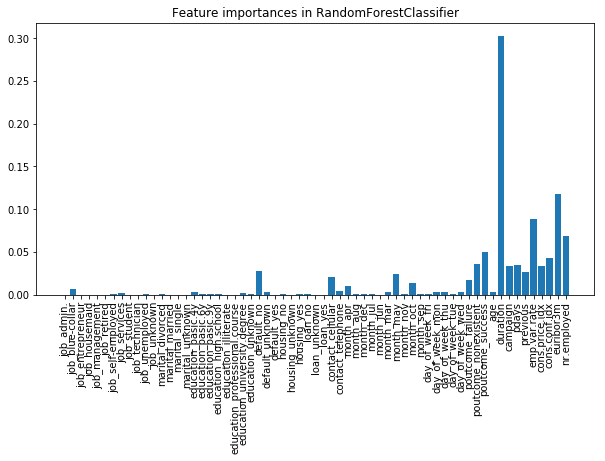

array([0.85865845, 0.86909651, 0.88329911, 0.88004791, 0.8886037 ,
       0.8711499 , 0.83863792, 0.90109514, 0.90006845, 0.87902122])

In [45]:
XX = pd.DataFrame(X)
XX.columns = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(10,5))
plt.bar(XX.columns, height=rfc.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importances in RandomForestClassifier')
plt.show()
cross_val_score(rfc, X, Y, cv=10)

In [53]:
type(X)#should i bother changing this to something else?

pandas.core.frame.DataFrame

In [28]:
# so far our results look decent - but we must increase precision
bal_df = pd.DataFrame(data = x_balanced , columns = x_var)
bal_red = bal_df.loc[:,['job_retired', 'job_self-employed', 'job_student', 'marital_unknown', 'default_unknown', 'contact_telephone', 'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'poutcome_failure', 'poutcome_success', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
bal_red.describe()
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(bal_red, y_balanced, test_size= 0.20, random_state=20)

In [29]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(46752, 22)
(46752,)
(11688, 22)
(11688,)


In [30]:

X_test.isnull().sum()

job_retired          0
job_self-employed    0
job_student          0
marital_unknown      0
default_unknown      0
contact_telephone    0
month_aug            0
month_jun            0
month_mar            0
month_may            0
month_nov            0
poutcome_failure     0
poutcome_success     0
duration             0
campaign             0
pdays                0
previous             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [49]:
#with sample df with reduced features 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
fit_and_train(knn)

----Results based only on training dataset----
Accuracy: 0.9993369267624914
predicted      0      1    All
actual                        
0          23318     13  23331
1             18  23403  23421
All        23336  23416  46752

Type I errors: 0.03%
Type II errors: 0.04%

Precision: 99.94%
Recall: 99.92%

----Results based on test dataset----
Accuracy: 0.9143566050650239
predicted     0     1    All
actual                      
0          5348   541   5889
1           460  5339   5799
All        5808  5880  11688

Type I errors: 4.63%
Type II errors: 3.94%

Precision: 90.8%
Recall: 92.07%


In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

fit_and_train(lr)

----Results based only on training dataset----
Accuracy: 0.8821226899383984
predicted      0      1    All
actual                        
0          20148   3183  23331
1           2328  21093  23421
All        22476  24276  46752

Type I errors: 6.81%
Type II errors: 4.98%

Precision: 86.89%
Recall: 90.06%

----Results based on test dataset----
Accuracy: 0.8822724161533196
predicted     0     1    All
actual                      
0          5055   834   5889
1           542  5257   5799
All        5597  6091  11688

Type I errors: 7.14%
Type II errors: 4.64%

Precision: 86.31%
Recall: 90.65%

Coefficients: [[  0.46725504  -0.18916564   0.34603836  -0.13157697  -0.57325333
   -0.60242494   1.19468625  -0.74283109   2.11504275  -0.86177189
   -0.79097844  -0.47421596   0.85679528  37.23297269  -3.79202921
   -0.77432674  -0.73372038 -11.24857857   5.76317627  -0.37692549
    4.2019629   -0.46355808]]
0.46725503720661177
0.34603835685039425
-0.5732533270263992
-0.6024249436805642
1.19468

In [51]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
fit_and_train(clf)

----Results based only on training dataset----
Accuracy: 0.8797912388774812
predicted      0      1    All
actual                        
0          20036   3295  23331
1           2325  21096  23421
All        22361  24391  46752

Type I errors: 7.05%
Type II errors: 4.97%

Precision: 86.49%
Recall: 90.07%

----Results based on test dataset----
Accuracy: 0.8795345653661876
predicted     0     1    All
actual                      
0          5022   867   5889
1           541  5258   5799
All        5563  6125  11688

Type I errors: 7.42%
Type II errors: 4.63%

Precision: 85.84%
Recall: 90.67%

Coefficients: [[ 1.41421022e-01 -6.35309958e-02  1.07855175e-01 -4.52727377e-02
  -1.58568923e-01 -2.23804474e-01  3.62922364e-01 -2.16579509e-01
   7.27255978e-01 -2.61468325e-01 -2.64438251e-01 -1.65269246e-01
   1.82404166e-01  1.05087947e+01 -9.81749667e-01 -2.51313264e-01
  -1.66378483e-01 -3.62088104e+00  1.92838642e+00  9.52765241e-03
   1.33793390e+00 -9.05154187e-02]]
0.36292236439775855

In [52]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
fit_and_train(rfc)

----Results based only on training dataset----
Accuracy: 0.8994267624914443
predicted      0      1    All
actual                        
0          19934   3397  23331
1           1305  22116  23421
All        21239  25513  46752

Type I errors: 7.27%
Type II errors: 2.79%

Precision: 86.69%
Recall: 94.43%

----Results based on test dataset----
Accuracy: 0.8986139630390144
predicted     0     1    All
actual                      
0          5016   873   5889
1           312  5487   5799
All        5328  6360  11688

Type I errors: 7.47%
Type II errors: 2.67%

Precision: 86.27%
Recall: 94.62%


In [54]:
from sklearn.svm import SVC
svc = SVC()
fit_and_train(svc)
cross_val_score(svc, X, Y, cv=10)

----Results based only on training dataset----
Accuracy: 0.8877908966461328
predicted      0      1    All
actual                        
0          19749   3582  23331
1           1664  21757  23421
All        21413  25339  46752

Type I errors: 7.66%
Type II errors: 3.56%

Precision: 85.86%
Recall: 92.9%

----Results based on test dataset----
Accuracy: 0.8878336755646817
predicted     0     1    All
actual                      
0          4951   938   5889
1           373  5426   5799
All        5324  6364  11688

Type I errors: 8.03%
Type II errors: 3.19%

Precision: 85.26%
Recall: 93.57%


array([0.89052812, 0.88470588, 0.88534759, 0.88834225, 0.88385027,
       0.88385027, 0.88449198, 0.88171123, 0.89026738, 0.88278075])

In [85]:
X.columns

Index(['job_retired', 'job_self-employed', 'job_student', 'marital_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_failure',
       'poutcome_success', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [75]:
#base data frame with one hot encoded categoricals and 
allfeat_df.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000
mean,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,...,-4.097162e-19,-2.393605e-18,-6.348444e-17,8.625604e-19,-1.380726e-13,-1.949783e-11,-4.129698e-13,1.041697e-14,1.168824e-11,0.112654
std,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,...,5.272047e-02,5.036388e-02,1.870980e-01,7.070015e-02,3.272833e-01,2.255807e-01,1.936484e-01,3.932096e-01,2.731627e-01,0.316173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.251830e-02,-2.850168e-02,-9.634389e-01,-2.470900e-02,-7.253928e-01,-5.357227e-01,-4.308535e-01,-6.772366e-01,-7.691339e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.177816e-02,-2.850168e-02,3.656111e-02,-2.470900e-02,-3.920595e-01,-1.951147e-01,-9.194141e-02,-5.162754e-01,-2.568465e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.591806e-02,-1.031986e-02,3.656111e-02,-2.470900e-02,2.121072e-01,6.755091e-02,-5.428451e-02,2.801426e-01,9.060147e-02,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.234546e-02,7.861954e-03,3.656111e-02,-2.470900e-02,2.746072e-01,1.630303e-01,1.716569e-01,3.037201e-01,2.308661e-01,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.474817e-01,9.714983e-01,3.656111e-02,9.752910e-01,2.746072e-01,4.642773e-01,5.691465e-01,3.227634e-01,2.308661e-01,1.000000


In [77]:
allfeat_df["converstion_rate"] = allfeat_df['y']/allfeat_df['campaign']
allfeat_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,converstion_rate
0,0,0,0,1,0,0,0,0,0,0,...,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,0,-0.0
1,0,0,0,0,0,0,0,1,0,0,...,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,0,-0.0
2,0,0,0,0,0,0,0,1,0,0,...,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,0,-0.0
3,1,0,0,0,0,0,0,0,0,0,...,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,0,-0.0
4,0,0,0,0,0,0,0,1,0,0,...,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,0,-0.0


In [91]:
allfeat_df["converstion_rate"].unique()

array([ -0.        , -35.08564879, -96.90050475, 127.19483436,
        38.39689481,  22.6113429 ,  16.02373845,   2.69180223,
         6.52245518,   8.55045331,   7.40002483,   4.42392192,
         5.83096097,  12.40860639,  10.12442458,   3.81086801,
         5.27203333,   4.8108852 ])

In [92]:
features = allfeat_df.loc[:,['job_retired', 'job_self-employed', 'job_student', 'marital_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_failure',
       'poutcome_success', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed','conversion_rate']]

c:\users\imnus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [90]:
features.head()

,job_retired,job_self-employed,job_student,marital_unknown,default_unknown,contact_telephone,month_aug,month_jun,month_mar,month_may,...,poutcome_success,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,conversion_rate
0,0,0,0,0,0,1,0,0,0,1,...,0,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,NaN
1,0,0,0,0,1,1,0,0,0,1,...,0,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,NaN
2,0,0,0,0,0,1,0,0,0,1,...,0,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,NaN
3,0,0,0,0,0,1,0,0,0,1,...,0,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,NaN
4,0,0,0,0,0,1,0,0,0,1,...,0,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,NaN


In [17]:
bal_red.columns
#y_balanced.shape
bal_red= bal_red.loc[:,['job_retired', 'job_self-employed', 'job_student', 'marital_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_failure',
       'poutcome_success', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']]

NameError: name 'bal_red' is not defined

In [107]:
bal_red['conversion_rate'] = y_balanced/bal_red['campaign']
bal_red.head()

,job_retired,job_self-employed,job_student,marital_unknown,default_unknown,contact_telephone,month_aug,month_jun,month_mar,month_may,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,conversion_rate
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.000552,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,-0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.022221,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,-0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.006565,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,-0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.021815,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,-0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.009905,-0.028502,0.036561,-0.024709,0.212107,0.16303,0.171657,0.280143,0.090601,-0.0


In [108]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(bal_red, y_balanced, test_size= 0.20, random_state=20)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
fit_and_train(knn)

----Results based only on training dataset----
Accuracy: 1.0
predicted      0      1    All
actual                        
0          29200      0  29200
1              0  29276  29276
All        29200  29276  58476

Type I errors: 0.0%
Type II errors: 0.0%

Precision: 100.0%
Recall: 100.0%

----Results based on test dataset----
Accuracy: 1.0
predicted     0     1    All
actual                      
0          7348     0   7348
1             0  7272   7272
All        7348  7272  14620

Type I errors: 0.0%
Type II errors: 0.0%

Precision: 100.0%
Recall: 100.0%


In [ ]:
#case of overfitting the information above - plot rfc importances here to exhibit that scenaria

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

fit_and_train(lr)

----Results based only on training dataset----
Accuracy: 0.8830460359805732
predicted      0      1    All
actual                        
0          25226   3974  29200
1           2865  26411  29276
All        28091  30385  58476

Type I errors: 6.8%
Type II errors: 4.9%

Precision: 86.92%
Recall: 90.21%

----Results based on test dataset----
Accuracy: 0.8820109439124487
predicted     0     1    All
actual                      
0          6334  1014   7348
1           711  6561   7272
All        7045  7575  14620

Type I errors: 6.94%
Type II errors: 4.86%

Precision: 86.61%
Recall: 90.22%

Coefficients: [[ 4.87692386e-01 -1.33772125e-01  3.69516476e-01 -4.28819774e-01
  -5.74939382e-01 -5.50734812e-01  1.06318186e+00 -7.16151511e-01
   1.96297195e+00 -9.14678164e-01 -9.31362955e-01 -4.95400974e-01
   8.64214310e-01  3.79299609e+01 -2.70027957e+00 -6.91945828e-01
  -5.12994845e-01 -1.05089589e+01  4.87113028e+00 -4.50436823e-01
   4.62743697e+00 -1.55296805e+00 -5.29523357e-06]]
0.487

In [56]:
from sklearn.svm import LinearSVC
lclf = LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
fit_and_train(lclf)

----Results based only on training dataset----
Accuracy: 0.7351129363449692
predicted      0      1    All
actual                        
0          19050   4281  23331
1           8103  15318  23421
All        27153  19599  46752

Type I errors: 9.16%
Type II errors: 17.33%

Precision: 78.16%
Recall: 65.4%

----Results based on test dataset----
Accuracy: 0.740930869267625
predicted     0     1    All
actual                      
0          4816  1073   5889
1          1955  3844   5799
All        6771  4917  11688

Type I errors: 9.18%
Type II errors: 16.73%

Precision: 78.18%
Recall: 66.29%


In [112]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
fit_and_train(rfc)

----Results based only on training dataset----
Accuracy: 0.9935187085299952
predicted      0      1    All
actual                        
0          28956    244  29200
1            135  29141  29276
All        29091  29385  58476

Type I errors: 0.42%
Type II errors: 0.23%

Precision: 99.17%
Recall: 99.54%

----Results based on test dataset----
Accuracy: 0.9930916552667579
predicted     0     1    All
actual                      
0          7286    62   7348
1            39  7233   7272
All        7325  7295  14620

Type I errors: 0.42%
Type II errors: 0.27%

Precision: 99.15%
Recall: 99.46%


In [ ]:
from sklearn.svm import SVC
svc = SVC()
fit_and_train(svc)
cross_val_score(svc, X, Y, cv=10)

----Results based only on training dataset----
Accuracy: 0.8877908966461328
predicted      0      1    All
actual                        
0          19749   3582  23331
1           1664  21757  23421
All        21413  25339  46752

Type I errors: 7.66%
Type II errors: 3.56%

Precision: 85.86%
Recall: 92.9%

----Results based on test dataset----
Accuracy: 0.8878336755646817
predicted     0     1    All
actual                      
0          4951   938   5889
1           373  5426   5799
All        5324  6364  11688

Type I errors: 8.03%
Type II errors: 3.19%

Precision: 85.26%
Recall: 93.57%


In [31]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(46752, 22)
(46752,)
(11688, 22)
(11688,)


In [33]:
print(X.columns)
#print(Y.columns)
print(X_test.columns)
#print(Y_test.columns)

Index(['job_retired', 'job_self-employed', 'job_student', 'marital_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_failure',
       'poutcome_success', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')
Index(['job_retired', 'job_self-employed', 'job_student', 'marital_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_failure',
       'poutcome_success', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')


In [35]:
X = X.loc[:,X.columns != 'duration']

In [36]:
X_test = X_test.loc[:,X_test.columns != 'duration']

In [54]:
#FINAL ROUND AFTER ELIMINATING duration column
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
fit_and_train(knn)
cross_val_score(knn, X, Y, cv=10)

----Results based only on training dataset----
Accuracy: 0.9435318275154004
predicted      0      1    All
actual                        
0          22158   1173  23331
1           1467  21954  23421
All        23625  23127  46752

Type I errors: 2.51%
Type II errors: 3.14%

Precision: 94.93%
Recall: 93.74%

----Results based on test dataset----
Accuracy: 0.9075119780971937
predicted     0     1    All
actual                      
0          5402   487   5889
1           594  5205   5799
All        5996  5692  11688

Type I errors: 4.17%
Type II errors: 5.08%

Precision: 91.44%
Recall: 89.76%


array([0.89330768, 0.8973262 , 0.89925134, 0.90074866, 0.89475936,
       0.90588235, 0.89860963, 0.89946524, 0.90224599, 0.89647059])

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

fit_and_train(lr)
cross_val_score(lr, X, Y, cv=10)

----Results based only on training dataset----
Accuracy: 0.7452729295003422
predicted      0      1    All
actual                        
0          20117   3214  23331
1           8695  14726  23421
All        28812  17940  46752

Type I errors: 6.87%
Type II errors: 18.6%

Precision: 82.08%
Recall: 62.88%

----Results based on test dataset----
Accuracy: 0.7500855578370978
predicted     0     1    All
actual                      
0          5065   824   5889
1          2097  3702   5799
All        7162  4526  11688

Type I errors: 7.05%
Type II errors: 17.94%

Precision: 81.79%
Recall: 63.84%


array([0.74898439, 0.74032086, 0.75058824, 0.74417112, 0.73582888,
       0.74459893, 0.75058824, 0.7428877 , 0.74973262, 0.74352941])

In [55]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
fit_and_train(clf)
cross_val_score(clf, X_test, Y_test, cv=10)

----Results based only on training dataset----
Accuracy: 0.7351984941820671
predicted      0      1    All
actual                        
0          19053   4278  23331
1           8102  15319  23421
All        27155  19597  46752

Type I errors: 9.15%
Type II errors: 17.33%

Precision: 78.17%
Recall: 65.41%

----Results based on test dataset----
Accuracy: 0.7411019849418207
predicted     0     1    All
actual                      
0          4818  1071   5889
1          1955  3844   5799
All        6773  4915  11688

Type I errors: 9.16%
Type II errors: 16.73%

Precision: 78.21%
Recall: 66.29%


array([0.75106929, 0.73823781, 0.7459367 , 0.76561163, 0.71941831,
       0.72112917, 0.72797263, 0.75021386, 0.7219846 , 0.7403599 ])

In [43]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
fit_and_train(rfc)
print(cross_val_score(rfc, X, Y, cv=10))
cross_val_score(rfc, X_test, Y_test, cv=10)

----Results based only on training dataset----
Accuracy: 0.8417607802874744
predicted      0      1    All
actual                        
0          20954   2377  23331
1           5021  18400  23421
All        25975  20777  46752

Type I errors: 5.08%
Type II errors: 10.74%

Precision: 88.56%
Recall: 78.56%

----Results based on test dataset----
Accuracy: 0.8474503764544832
predicted     0     1    All
actual                      
0          5286   603   5889
1          1180  4619   5799
All        6466  5222  11688

Type I errors: 5.16%
Type II errors: 10.1%

Precision: 88.45%
Recall: 79.65%
[0.84605516 0.84770053 0.85090909 0.84983957 0.83721925 0.84171123
 0.84684492 0.83828877 0.8459893  0.85026738]


array([0.85372113, 0.84260051, 0.83575706, 0.86655261, 0.85457656,
       0.83404619, 0.84687767, 0.86398631, 0.8314799 , 0.85775493])

In [40]:
from sklearn.svm import SVC
svc = SVC()
fit_and_train(svc)
cross_val_score(svc, X, Y, cv=10)

----Results based only on training dataset----
Accuracy: 0.8075376454483231
predicted      0      1    All
actual                        
0          20490   2841  23331
1           6157  17264  23421
All        26647  20105  46752

Type I errors: 6.08%
Type II errors: 13.17%

Precision: 85.87%
Recall: 73.71%

----Results based on test dataset----
Accuracy: 0.8087782340862423
predicted     0     1    All
actual                      
0          5159   730   5889
1          1505  4294   5799
All        6664  5024  11688

Type I errors: 6.25%
Type II errors: 12.88%

Precision: 85.47%
Recall: 74.05%


array([0.80885183, 0.79679144, 0.80834225, 0.81026738, 0.80085561,
       0.80192513, 0.80898396, 0.79893048, 0.80128342, 0.8059893 ])

In [57]:
#final CV scores
print("KNN :")
print(cross_val_score(knn, X, Y, cv=10))
print("Linear SVC :")
print(cross_val_score(lclf, X, Y, cv=10))
print("Logistic Regression :")
print(cross_val_score(clf, X, Y, cv=10))
print("Random Forest Classifier :")
print(cross_val_score(rfc, X, Y, cv=10))
print("Support Vector Classifier :")
print(cross_val_score(svc, X, Y, cv=10))

KNN :
[0.89330768 0.8973262  0.89925134 0.90074866 0.89475936 0.90588235
 0.89860963 0.89946524 0.90224599 0.89647059]
Linear SVC :
[0.7370109  0.72513369 0.73625668 0.74053476 0.72770053 0.73540107
 0.73839572 0.73625668 0.74459893 0.73240642]
Logistic Regression :
[0.7370109  0.72513369 0.73647059 0.74053476 0.72770053 0.73540107
 0.74010695 0.73647059 0.74438503 0.73240642]
Random Forest Classifier :
[0.84370323 0.85005348 0.84663102 0.85625668 0.84235294 0.83679144
 0.84406417 0.83871658 0.85112299 0.85518717]
Support Vector Classifier :


KeyboardInterrupt: 

In [58]:
print(x)

NameError: name 'x' is not defined

In [71]:
KNN = [0.89330768, 0.8973262,  0.89925134, 0.90074866, 0.89475936, 0.90588235,
 0.89860963, 0.89946524, 0.90224599, 0.89647059]
Random_Forest = [0.84370323, 0.85005348, 0.84663102, 0.85625668, 0.84235294, 0.83679144,
 0.84406417, 0.83871658, 0.85112299, 0.85518717]
Logistic_regression = [0.74898439, 0.74032086, 0.75058824, 0.74417112, 0.73582888,
       0.74459893, 0.75058824, 0.7428877 , 0.74973262, 0.74352941]
Linear_SVC = [0.7370109,  0.72513369, 0.73625668, 0.74053476, 0.72770053, 0.73540107,
 0.73839572, 0.73625668, 0.74459893, 0.73240642] 
SVC = [0.80885183, 0.79679144, 0.80834225, 0.81026738, 0.80085561, 0.80192513, 0.80898396, 0.79893048, 0.80128342, 0.8059893 ]

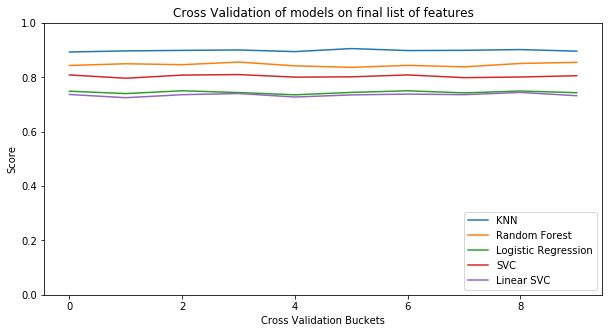

In [72]:
plt.xlabel("Cross Validation Buckets")
plt.ylabel("Score")
plt.title("Cross Validation of models on final list of features")
plt.plot(KNN, label = 'KNN')
plt.plot(Random_Forest, label = 'Random Forest')
plt.plot(Logistic_regression, label = "Logistic Regression")
plt.plot(SVC, label = 'SVC')
plt.plot(Linear_SVC, label = 'Linear SVC')
plt.plot()
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.show()

In [73]:
X.columns

Index(['job_retired', 'job_self-employed', 'job_student', 'marital_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'poutcome_failure',
       'poutcome_success', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')